In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)   # We can see up to 200 columns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
!ls

Airlines logistic regression .ipynb  faa_tail_number_inquiry.jsonl
Airlines logistic regression1 .ipynb graph.json
Airlines logistic regression2 .ipynb https.docx
AirlinesSQL.ipynb                    networkxD3.egg-info
EDA Airlines.ipynb                   numeric_file.csv
Performance_2015.csv                 numeric_file.p
Untitled                             setupd
Untitled.ipynb                       setupd.py
Untitled1.ipynb                      tail.csv
Untitled2.ipynb                      tail1.csv
airlines.ipynb                       triald3force.ipynb
dataorigin.xlsx                      working_file
decorator.ipynb                      working_file.p
delays.xlsx                          working_file1.csv
delays1.csv


In [3]:
import pickle
with open('numeric_file.p', 'rb') as read_file:
     wdf = pickle.load(read_file)

In [4]:
wdf.head(5) # This is used to get the column names to copy paste in the following cell

,quarter,month,dayofmonth,dayofweek,airlineid,flightnum,originairportid,origincitymarketid,originstatefips,destairportid,destcitymarketid,deststatefips,crsdeptime,deptime,depdelay,depdelayminutes,depdel15,departuredelaygroups,crsarrtime,arrtime,arrdelay,arrdelayminutes,arrdel15,arrivaldelaygroups,cancelled,airtime,flights,distance,distancegroup,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,mfr_year,serial_number
0,3,8,3,1,19393,253,13244,33244,47,13204,31454,12,1350,1353,3,3.0,0.0,0.0,1650,1700.0,10.0,10.0,0.0,0.0,0.0,109.0,1.0,684.0,3,0,0,0,0,0,2009,36641.0
1,3,8,3,1,19393,286,12892,32575,6,12191,31453,48,555,552,-3,0.0,0.0,-1.0,1115,1109.0,-6.0,0.0,0.0,-1.0,0.0,171.0,1.0,1390.0,6,0,0,0,0,0,2009,36641.0
2,3,8,3,1,19393,60,12191,31453,48,11259,30194,48,2100,2216,76,76.0,1.0,5.0,2155,2311.0,76.0,76.0,1.0,5.0,0.0,39.0,1.0,239.0,1,72,0,0,0,4,2009,36641.0
3,3,8,3,1,19393,950,14492,34492,37,12191,31453,48,1840,1951,71,71.0,1.0,4.0,2025,2133.0,68.0,68.0,1.0,4.0,0.0,147.0,1.0,1050.0,5,68,0,0,0,0,2009,36641.0
4,3,8,3,1,19393,1009,11292,30325,8,14679,33570,6,900,854,-6,0.0,0.0,-1.0,1015,1012.0,-3.0,0.0,0.0,-1.0,0.0,114.0,1.0,853.0,4,0,0,0,0,0,2009,36643.0


In [5]:
len(wdf)

4958474

# Description of the fields
    quarter                   int64    The quarter during which the plane has been flying
    month                     int64
    dayofmonth                int64
    dayofweek                 int64
    airlineid                 int64
    flightnum                 int64
    originairportid           int64
    origincitymarketid        int64
    originstatefips           int64
    destairportid             int64
    destcitymarketid          int64
    deststatefips             int64
    crsdeptime                int64
    deptime                   int64
    depdelay                  int64
    depdelayminutes         float64
    depdel15                float64  0.0 or 1.0 (there is a delay at departure (1))
    departuredelaygroups    float64
    crsarrtime                int64
    arrtime                 float64
    arrdelay                float64  could be -6 if it was in advance by 6 minutes
    arrdelayminutes         float64  only keep the delay
    arrdel15                float64  this is our y: 0.0 or 1.0 (there is a delay at arrival (1)
    arrivaldelaygroups      float64  this will be another y multinomial classification
    cancelled               float64
    airtime                 float64
    flights                 float64
    distance                float64
    distancegroup             int64
    carrierdelay              int64  minutes due to carrier
    weatherdelay              int64  minutes due to weather
    nasdelay                  int64   
    securitydelay             int64  minutes due to security
    lateaircraftdelay         int64  minutes due to aircraft
    mfr_year                  int64  year the plane was built
    serial_number           float64  serial number of the plane

In [6]:
# we want to predict the 0 / 1  values of the arrde115 variable
# we are going to drop the arrival delay data because they are known after the plane has arrived

In [7]:
wdf1 = wdf.drop(
            [
            'arrdelay',
            'arrdelayminutes',
            'arrivaldelaygroups',
             'carrierdelay',
             'weatherdelay',
             'nasdelay',
             'securitydelay',
             'lateaircraftdelay',
            ]
            ,axis = 1 )

In [8]:
wdf1.head()

,quarter,month,dayofmonth,dayofweek,airlineid,flightnum,originairportid,origincitymarketid,originstatefips,destairportid,destcitymarketid,deststatefips,crsdeptime,deptime,depdelay,depdelayminutes,depdel15,departuredelaygroups,crsarrtime,arrtime,arrdel15,cancelled,airtime,flights,distance,distancegroup,mfr_year,serial_number
0,3,8,3,1,19393,253,13244,33244,47,13204,31454,12,1350,1353,3,3.0,0.0,0.0,1650,1700.0,0.0,0.0,109.0,1.0,684.0,3,2009,36641.0
1,3,8,3,1,19393,286,12892,32575,6,12191,31453,48,555,552,-3,0.0,0.0,-1.0,1115,1109.0,0.0,0.0,171.0,1.0,1390.0,6,2009,36641.0
2,3,8,3,1,19393,60,12191,31453,48,11259,30194,48,2100,2216,76,76.0,1.0,5.0,2155,2311.0,1.0,0.0,39.0,1.0,239.0,1,2009,36641.0
3,3,8,3,1,19393,950,14492,34492,37,12191,31453,48,1840,1951,71,71.0,1.0,4.0,2025,2133.0,1.0,0.0,147.0,1.0,1050.0,5,2009,36641.0
4,3,8,3,1,19393,1009,11292,30325,8,14679,33570,6,900,854,-6,0.0,0.0,-1.0,1015,1012.0,0.0,0.0,114.0,1.0,853.0,4,2009,36643.0


In [17]:
wdf1.dtypes

quarter                   int64
month                     int64
dayofmonth                int64
dayofweek                 int64
airlineid                 int64
flightnum                 int64
originairportid           int64
origincitymarketid        int64
originstatefips           int64
destairportid             int64
destcitymarketid          int64
deststatefips             int64
crsdeptime                int64
deptime                   int64
depdelay                  int64
depdelayminutes         float64
depdel15                float64
departuredelaygroups    float64
crsarrtime                int64
arrtime                 float64
arrdel15                float64
cancelled               float64
airtime                 float64
flights                 float64
distance                float64
distancegroup             int64
mfr_year                  int64
serial_number           float64
dtype: object

In [9]:
len(wdf1) # we have almost 5 million records

4958474

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = wdf1.drop(columns='arrdel15')
y = wdf1['arrdel15']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

In [18]:
X.dtypes

quarter                   int64
month                     int64
dayofmonth                int64
dayofweek                 int64
airlineid                 int64
flightnum                 int64
originairportid           int64
origincitymarketid        int64
originstatefips           int64
destairportid             int64
destcitymarketid          int64
deststatefips             int64
crsdeptime                int64
deptime                   int64
depdelay                  int64
depdelayminutes         float64
depdel15                float64
departuredelaygroups    float64
crsarrtime                int64
arrtime                 float64
cancelled               float64
airtime                 float64
flights                 float64
distance                float64
distancegroup             int64
mfr_year                  int64
serial_number           float64
dtype: object

In [12]:
############# BEGIN PART 1 Logistic Regression ##########
from sklearn.linear_model import LogisticRegression

In [13]:
lm1 = LogisticRegression(C=.001)
lm1.fit(X_train, y_train)
lm1.score(X_test, y_test)

0.9344086187760623

In [16]:
import pickle
pickle.dump(lm1,open("./data/savelogreg.p","wb")) # saving the model to use in the app 

In [21]:
input_df = [[1,
  1,
  1,
  1,
  19393,
  253,
  13244,
  33244,
  47,
  13204,
  31454,
  12,
  1350,
  1353,
  3,
  3.0,
  0.0,
  0.0,
  1650,
  1700.0,
  0.0,
  109.0,
  1.0,
  684.0,
  3,
  2009,
  36641.0]]

[[1,
  1,
  1,
  1,
  19393,
  253,
  13244,
  33244,
  47,
  13204,
  31454,
  12,
  1350,
  1353,
  3,
  3.0,
  0.0,
  0.0,
  1650,
  1700.0,
  0.0,
  109.0,
  1.0,
  684.0,
  3,
  2009,
  36641.0]]

In [25]:
lm1.predict(input_df)  # to prepare for the app. wE need to take [0] to get the number in the array

array([0.])

In [17]:
lm1.coef_, lm1.intercept_ # highest values(e-02) are: delays at departure(depdelay and depdelayminutes) and distance

(array([[-5.92189427e-04, -1.68877521e-03, -1.08967728e-03,
         -4.04615085e-04,  5.32487449e-05,  2.89729127e-05,
          9.74689387e-05, -1.15859498e-04, -7.31936946e-04,
         -1.41852819e-05, -6.74394565e-05,  1.06167306e-03,
          9.60991308e-04, -8.41007054e-04,  7.39846954e-02,
          6.64488803e-02,  1.98335935e-03,  5.24057319e-03,
         -2.35473449e-04,  2.69457646e-04, -2.13361114e-05,
          3.99543383e-02, -1.64562188e-05, -4.86211535e-03,
         -8.53765353e-05, -9.52968458e-05,  6.98696125e-09]]),
 array([-1.64562188e-05]))

In [18]:
from sklearn.metrics import confusion_matrix
feature = X_test
y_predict = lm1.predict(feature) 
# predict returns array([0.]) or array([1.])- int(lm1.predict(input_df)[0]) is needed to get a 0/1 used in flask
confusion_matrix(y_test, y_predict)

array([[1200455,   18127],
       [  79031,  189930]])

In [19]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve,f1_score, fbeta_score

In [20]:
precision_score(y_test, y_predict,labels=None, pos_label=1, average='binary', sample_weight=None);
recall_score(y_test, y_predict);
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))

0.9128748371840409
0.7061618598979034


In [21]:
# f1 score
y_predict = lm1.predict(X_test)
f1_score(y_test, y_predict)

0.7963221513653573

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lm1.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.94      0.99      0.96   1218582
        1.0       0.91      0.71      0.80    268961

avg / total       0.93      0.93      0.93   1487543



In [24]:
fpr, tpr, thresholds = roc_curve(y_test, lm1.predict_proba(X_test)[:,1])

ROC AUC score =  0.9449876496456802


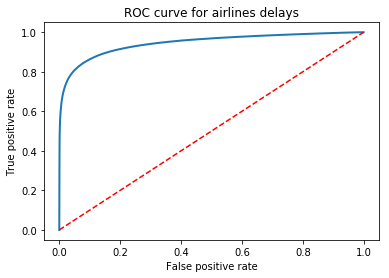

In [25]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='r',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for airlines delays');
print("ROC AUC score = ", roc_auc_score(y_test, lm1.predict_proba(X_test)[:,1]))

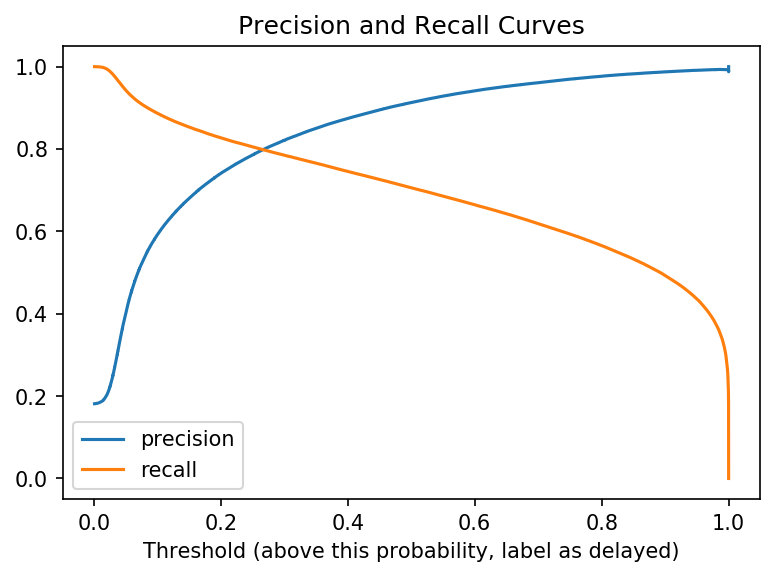

In [26]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, lm1.predict_proba(X_test)[:,1] )

plt.figure(dpi=150)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as delayed)');
plt.title('Precision and Recall Curves');

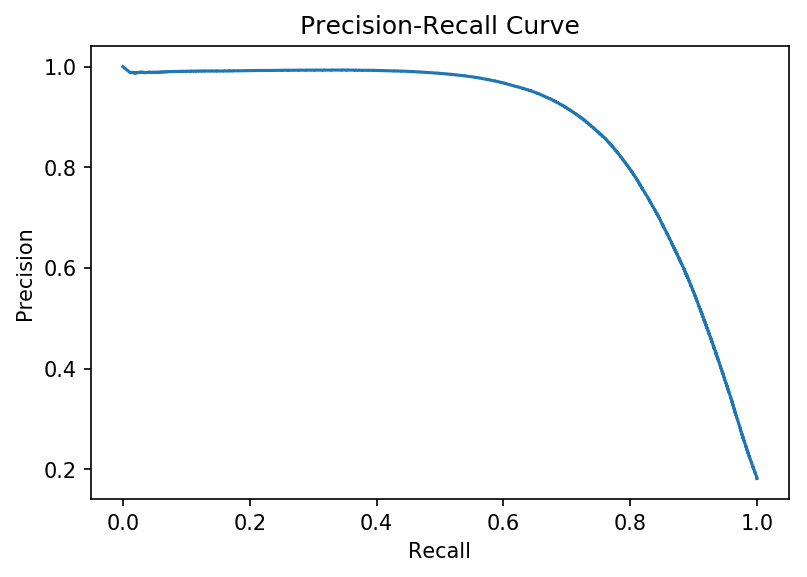

In [27]:
plt.figure(dpi=150)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [ ]:
############# END PART 1 Logistic Regression ##########

In [ ]:
#############  PART 2 Random Forest ##########

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,max_depth=5)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
feature = X_test
y_predict = rf.predict(feature)
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict))

[[1194813   23769]
 [  76839  192122]]
0.9323663248726255


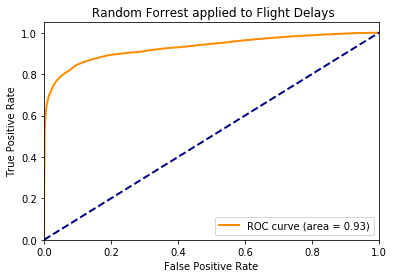

In [30]:
#####.  ROC AUC random forest ##### 
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Random Forrest applied to Flight Delays')
plt.legend(loc="lower right")
plt.show()

In [44]:
########## BEGIN PART 3 Neural Network ###########
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [45]:
ohe = LabelEncoder().fit(y_train)
y_train = ohe.transform(y_train)
y_test_t = ohe.transform(y_test)
y_train_t = np_utils.to_categorical(y_train)
y_test_t = np_utils.to_categorical(y_test_t)

In [46]:
y_train[:5]
y_train_t[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [47]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

model = Sequential()
model.add(Dense(8, input_dim=27, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train_t, epochs=10, batch_size=100)

Epoch 1/10
3470931/3470931 [==============================] - 55s 16us/step - loss: 0.4813 - acc: 0.8190
Epoch 2/10
3470931/3470931 [==============================] - 55s 16us/step - loss: 0.4729 - acc: 0.8190
Epoch 3/10
3470931/3470931 [==============================] - 54s 16us/step - loss: 0.4729 - acc: 0.8190
Epoch 4/10
3470931/3470931 [==============================] - 55s 16us/step - loss: 0.4729 - acc: 0.8190
Epoch 5/10
3470931/3470931 [==============================] - 57s 16us/step - loss: 0.4729 - acc: 0.8190
Epoch 6/10
3470931/3470931 [==============================] - 58s 17us/step - loss: 0.4729 - acc: 0.8190
Epoch 7/10
3470931/3470931 [==============================] - 58s 17us/step - loss: 0.4729 - acc: 0.8190
Epoch 8/10
3470931/3470931 [==============================] - 58s 17us/step - loss: 0.4729 - acc: 0.8190
Epoch 9/10
3470931/3470931 [==============================] - 61s 18us/step - loss: 0.4729 - acc: 0.8190
Epoch 10/10
3470931/3470931 [==========================

In [48]:
scores = model.evaluate(X_train, y_train_t)
scores

3470931/3470931 [==============================] - 49s 14us/step


[0.4728832553763988, 0.8190154169011482]

In [49]:
scores = model.evaluate(X_test, y_test_t)
scores

1487543/1487543 [==============================] - 21s 14us/step


[0.47261782673440356, 0.8191911090969097]

In [50]:
preds = model.predict(X_test)
preds_class = model.predict_classes(X_test)

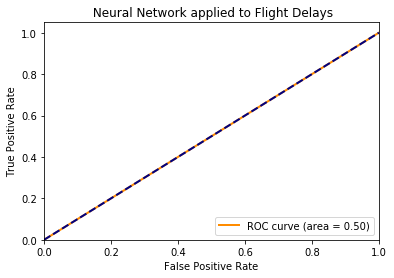

In [54]:

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Neural Network applied to Flight Delays')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#############    END Part 3 NEURAL NETWORKS ##################

In [ ]:
#############    BEGIN Part 4 k=5,10,9 Nearest Neighbors ##################

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("The score for KNN is")
print("Training: {:6.4f}%".format(100*knn.score(X_train, y_train)))
print("Test set: {:6.4f}%".format(100*knn.score(X_test, y_test)))

The score for KNN is
Training: 90.0901%
Test set: 86.7695%


In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, knn.predict(X_test))

array([[1187326,   31256],
       [ 165554,  103407]])

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test,knn.predict_proba(X_test)[:,1])

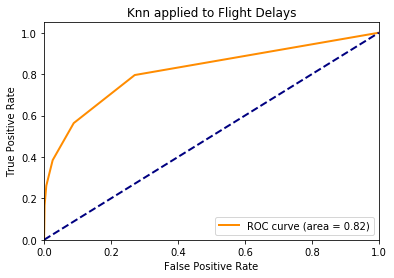

In [60]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn applied to Flight Delays')
plt.legend(loc="lower right")
plt.show()

The score for KNN is
Training: 86.7064%
Test set: 85.5360%


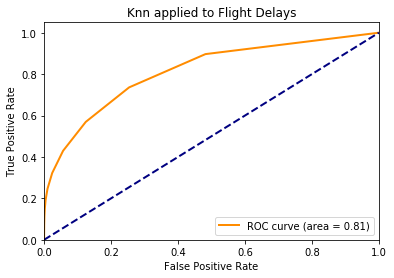

In [61]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print("The score for KNN is")
print("Training: {:6.4f}%".format(100*knn.score(X_train, y_train)))
print("Test set: {:6.4f}%".format(100*knn.score(X_test, y_test)))
confusion_matrix(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test,knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn applied to Flight Delays')
plt.legend(loc="lower right")
plt.show()

The score for KNN is
Training: 87.5991%
Test set: 85.8979%


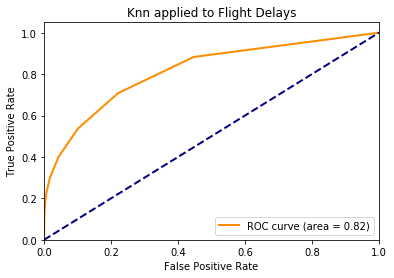

In [62]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print("The score for KNN is")
print("Training: {:6.4f}%".format(100*knn.score(X_train, y_train)))
print("Test set: {:6.4f}%".format(100*knn.score(X_test, y_test)))
confusion_matrix(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test,knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn applied to Flight Delays')
plt.legend(loc="lower right")
plt.show()

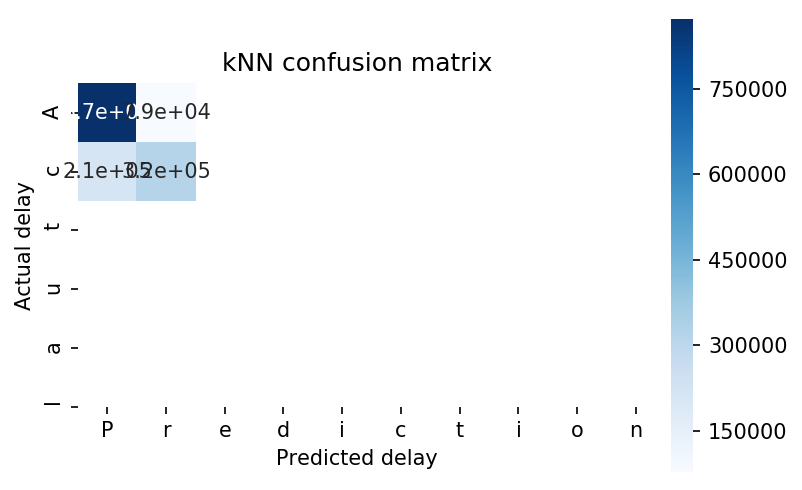

In [46]:
import seaborn as sns

knn_confusion = confusion_matrix(y_test, knn.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels='Prediction',
               yticklabels='Actual')

plt.xlabel('Predicted delay')
plt.ylabel('Actual delay')
plt.title('kNN confusion matrix');

In [47]:
#############    end of part 4 KNN #########

In [48]:
#############    START  part 5 SVM #########

In [49]:
from sklearn import svm
model_svm = svm.SVC(kernel='linear')

In [ ]:
# Stopped after 1hour run

In [ ]:
model_svm.fit(X_train, y_train)

In [ ]:
y_pred1 = model_svm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred1)

In [ ]:
confusion_matrix(y_test,y_pred1)

In [ ]:
model_svm2 = svm.SVC(kernel='rbf', gamma = 0.001)  # TRYING WITH A NON LINEAR KERNEL
model_svm2.fit(X_train, y_train)
y_pred2 = model_svm2.predict(X_test)
accuracy_score(y_test,y_pred2)

In [ ]:
confusion_matrix(y_test,y_pred2)

In [63]:
!pwd

/Users/i0s6026/Documents/Python/metis/Mcnulty Project
